In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle as pc
import sklearn.datasets as datasets
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# rede neural construida
import NN_Model as nn

In [3]:
plt.rcParams['figure.figsize'] = (10,6)
plt.style.use('dark_background')

# Artificial Datasets Tests

## Make Moons

In [3]:
x,y = datasets.make_moons(n_samples= 10000, noise = 0.12)

In [4]:
df = pd.DataFrame({'x_1': x[:,0], 'x_2': x[:,1], 'y': y})
df

,x_1,x_2,y
0,1.064238,-0.398281,1
1,2.056094,0.661805,1
2,-0.954283,0.185264,0
3,-0.085712,-0.324787,1
4,0.805295,0.749267,0
...,...,...,...
9995,-0.884213,0.085260,0
9996,0.497531,-0.508788,1
9997,0.026815,0.770343,0
9998,0.850527,0.339232,0


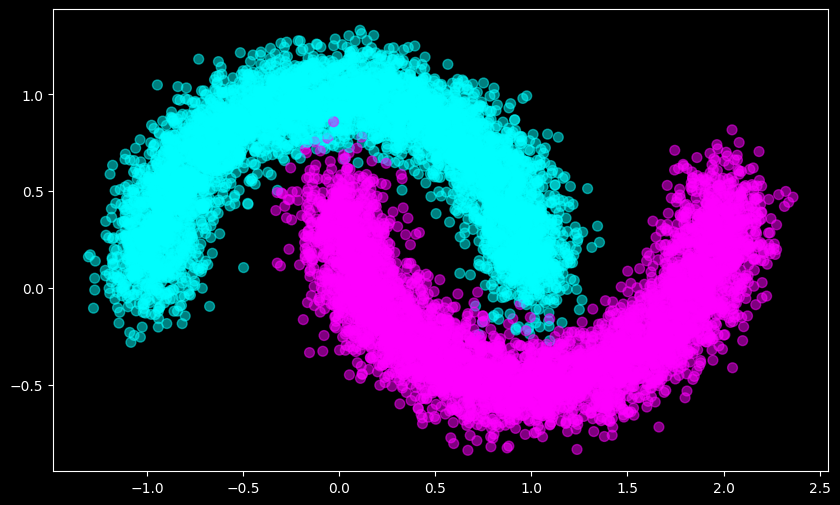

In [5]:
plt.scatter(df.x_1, df.x_2, c = df.y, s=50, alpha=0.5, cmap= 'cool')

In [6]:
# train-test split
x_train, x_test, y_train, y_test = tts(x,y, train_size=0.8)

In [7]:
model = nn.NN_Model(x_train, y_train, 50, 2)
results = model.fit(1000, 0.002)

 Epoch: [100 / 1000] Accuracy: 0.9955 Loss: 0.00000
 Epoch: [200 / 1000] Accuracy: 0.9962 Loss: 0.00000
 Epoch: [300 / 1000] Accuracy: 0.9962 Loss: 0.00000
 Epoch: [400 / 1000] Accuracy: 0.9962 Loss: 0.00000
 Epoch: [500 / 1000] Accuracy: 0.9965 Loss: 0.00000
 Epoch: [600 / 1000] Accuracy: 0.9962 Loss: 0.00000
 Epoch: [700 / 1000] Accuracy: 0.9964 Loss: 0.00000
 Epoch: [800 / 1000] Accuracy: 0.9965 Loss: 0.00000
 Epoch: [900 / 1000] Accuracy: 0.9965 Loss: 0.00000
 Epoch: [1000 / 1000] Accuracy: 0.9966 Loss: 0.00000


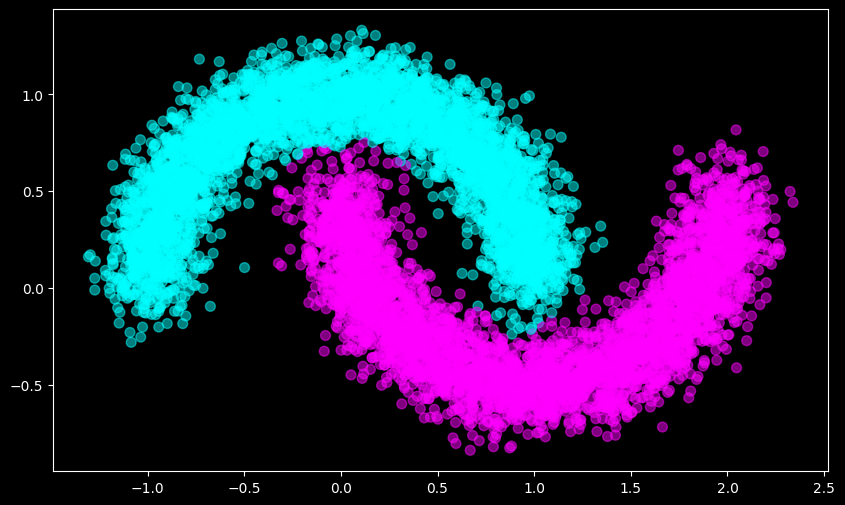

In [8]:
#training results
plt.scatter(x_train[:,0], x_train[:,1], c = results, s=50, alpha=0.5, cmap= 'cool')

In [9]:
# test predictions
predictions = model.predict(x_test)

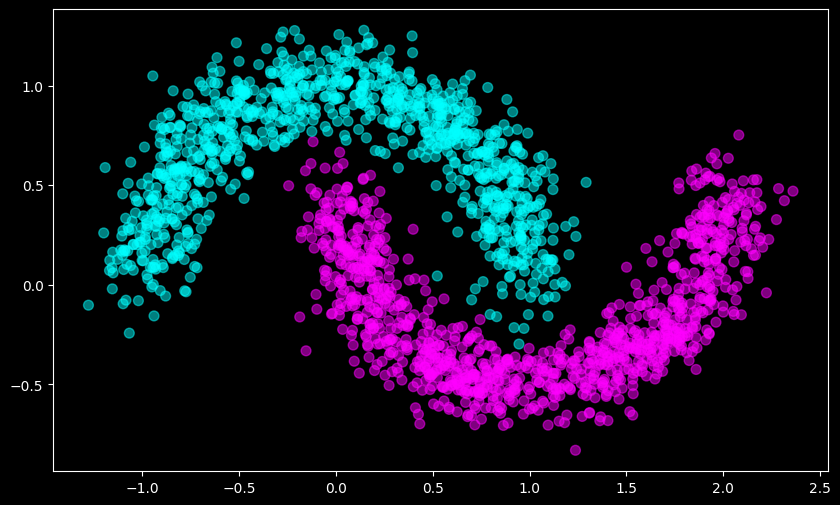

In [10]:
plt.scatter(x_test[:,0], x_test[:,1], c = predictions, s=50, alpha=0.5, cmap= 'cool')

In [11]:
correct = (predictions == y_test).sum()
accuracy = correct/y_test.shape[0]
accuracy

np.float64(0.9945)

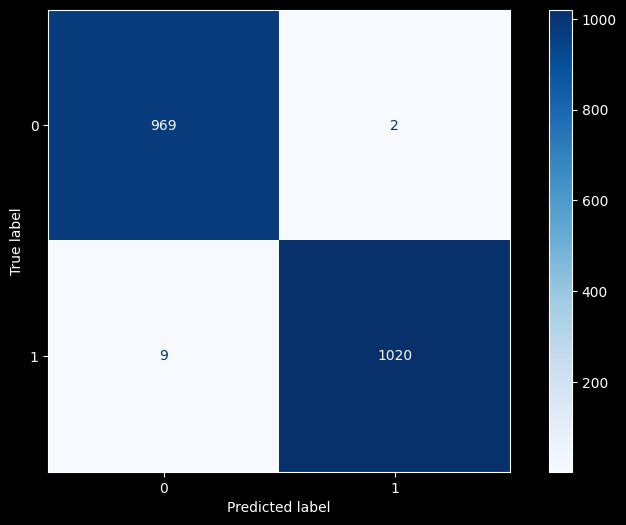

In [12]:
ConfusionMatrixDisplay.from_predictions(y_true = y_test,y_pred = predictions,cmap= 'Blues')

## Cluster Dataset

In [22]:
x_, y_ = datasets.make_blobs(n_samples=10000, n_features=3, centers= 4, cluster_std=1.0, shuffle= True)

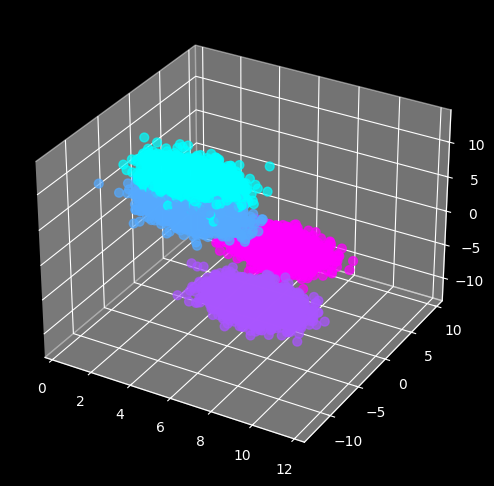

In [23]:
ax = plt.axes(projection = '3d')
ax.scatter3D(x_[:,0],x_[:,1],x_[:,2], s=40, c=y_,cmap='cool',alpha=0.7)

In [25]:
x_train

array([[ 3.8562007 , -6.29240832,  4.66517827],
       [ 9.7949598 , -9.5631886 , -0.89291706],
       [ 4.80167787, -4.88175704, 10.33217395],
       ...,
       [ 3.5869325 ,  6.27659438, -7.06396433],
       [ 3.90966767,  7.17775215, -8.00678945],
       [ 5.23756531, -4.93968744, 10.38056454]])

In [24]:
x_train, x_test, y_train, y_test = tts(x_,y_, train_size=0.8)

In [16]:
model = nn.NN_Model(x_train,y_train,20, 4)

In [17]:
results = model.fit(1000,0.002)

 Epoch: [100 / 1000] Accuracy: 0.9986 Loss: -0.00000
 Epoch: [200 / 1000] Accuracy: 0.9995 Loss: -0.00000
 Epoch: [300 / 1000] Accuracy: 0.9994 Loss: -0.00000
 Epoch: [400 / 1000] Accuracy: 0.9994 Loss: -0.00000
 Epoch: [500 / 1000] Accuracy: 0.9992 Loss: -0.00000
 Epoch: [600 / 1000] Accuracy: 0.9992 Loss: -0.00000
 Epoch: [700 / 1000] Accuracy: 0.9992 Loss: -0.00000
 Epoch: [800 / 1000] Accuracy: 0.9992 Loss: -0.00000
 Epoch: [900 / 1000] Accuracy: 0.9992 Loss: -0.00000
 Epoch: [1000 / 1000] Accuracy: 0.9992 Loss: -0.00000


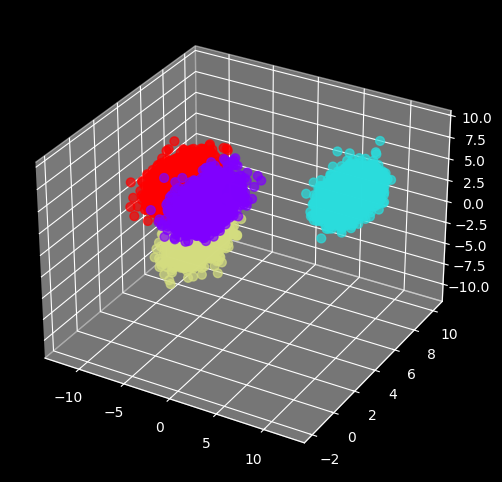

In [18]:
# training results

ax = plt.axes(projection = '3d')
ax.scatter3D(x_train[:,0],x_train[:,1],x_train[:,2],s=40, c=results,cmap='rainbow',alpha=0.7)

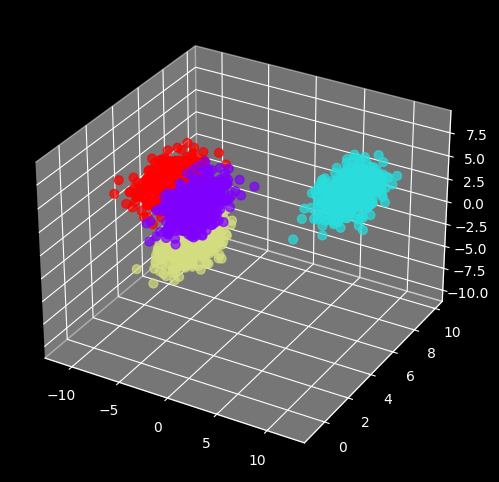

In [19]:
# Test results
predictions = model.predict(x_test)

ax = plt.axes(projection = '3d')
ax.scatter3D(x_test[:,0],x_test[:,1],x_test[:,2],s=40, c=predictions,cmap='rainbow',alpha=0.7)

In [20]:
confusion_matrix(y_test, predictions)

array([[500,   0,   0,   2],
       [  0, 492,   0,   0],
       [  0,   0, 517,   0],
       [  0,   0,   0, 489]])

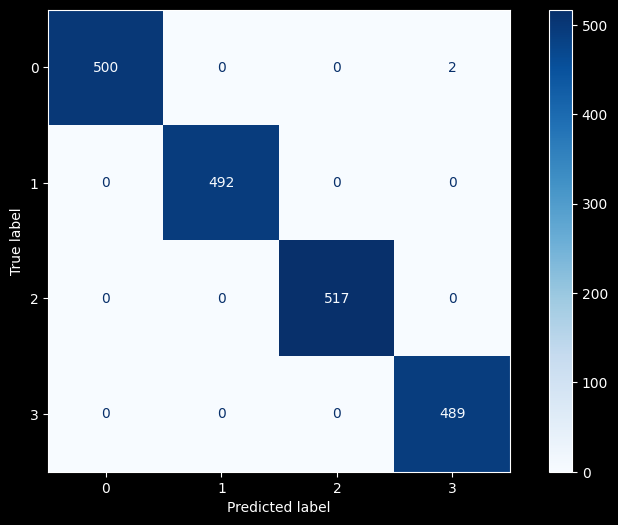

In [21]:
ConfusionMatrixDisplay.from_predictions(y_true = y_test,y_pred = predictions,cmap= 'Blues')

# Real Dataset Test

Iris dataset

In [21]:
data = datasets.load_iris()

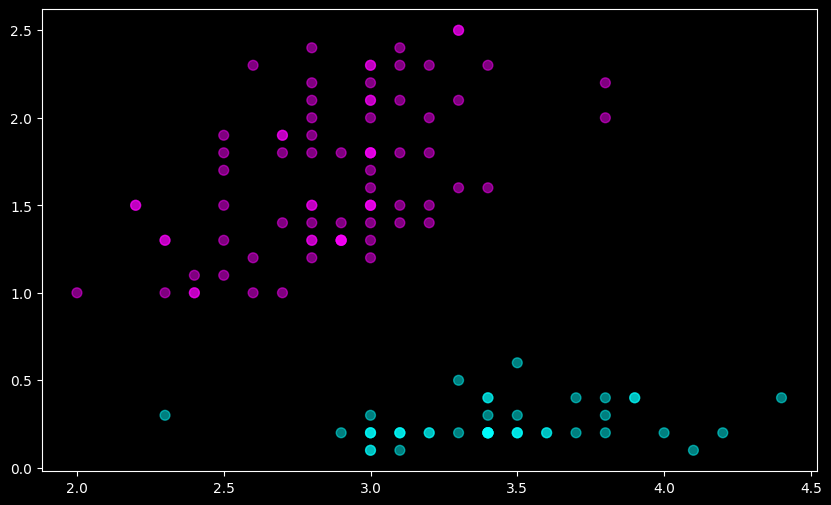

In [59]:
#training results
plt.scatter(x_train[:,1], x_train[:,3], c = results, s=50, alpha=0.5, cmap= 'cool')

In [60]:
y_train

array([0, 0, 0, 0, 1, 0, 0, 2, 0, 1, 1, 0, 0, 1, 2, 2, 1, 0, 2, 1, 0, 2,
       0, 1, 1, 2, 2, 0, 1, 0, 2, 2, 1, 0, 1, 2, 1, 2, 1, 2, 0, 1, 2, 2,
       0, 1, 0, 0, 1, 0, 1, 0, 2, 1, 1, 0, 2, 1, 0, 1, 2, 0, 1, 0, 0, 0,
       0, 2, 0, 1, 2, 0, 1, 2, 0, 1, 0, 0, 2, 2, 2, 0, 1, 1, 1, 2, 2, 2,
       2, 0, 1, 0, 2, 2, 2, 2, 1, 2, 2, 0, 1, 2, 0, 1, 0, 0, 1, 2, 1, 0,
       0, 1, 2, 0, 1, 2, 1, 1, 2, 1])

In [68]:
x_train, x_test, y_train, y_test = tts(data['data'],data['target'],test_size=0.2)

In [96]:
model = nn.NN_Model(x_train, y_train, 10, 3)
results = model.fit(100, 0.001)

 Epoch: [10 / 100] Accuracy: 0.7000 Loss: 0.0071535374587
 Epoch: [20 / 100] Accuracy: 0.8333 Loss: 0.0062424107092
 Epoch: [30 / 100] Accuracy: 0.9583 Loss: 0.0059747751249
 Epoch: [40 / 100] Accuracy: 0.9750 Loss: 0.0058599466361
 Epoch: [50 / 100] Accuracy: 0.9833 Loss: 0.0058025418969
 Epoch: [60 / 100] Accuracy: 0.9833 Loss: 0.0057717707095
 Epoch: [70 / 100] Accuracy: 0.9833 Loss: 0.0057411551442
 Epoch: [80 / 100] Accuracy: 0.9833 Loss: 0.0057526299298
 Epoch: [90 / 100] Accuracy: 0.9833 Loss: 0.0057888610587
 Epoch: [100 / 100] Accuracy: 0.9917 Loss: 0.0057736808898


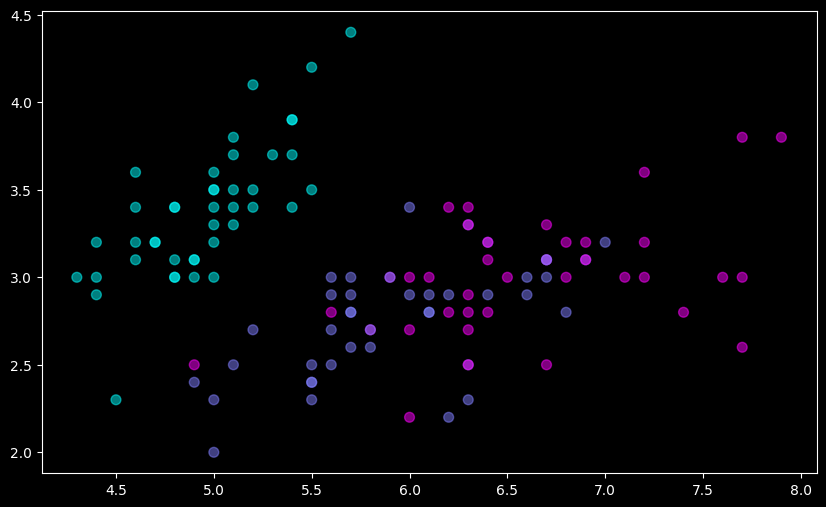

In [97]:
#training results
plt.scatter(x_train[:,0], x_train[:,1], c = results, s=50, alpha=0.5, cmap= 'cool')

In [98]:
# test predictions
predictions = model.predict(x_test)

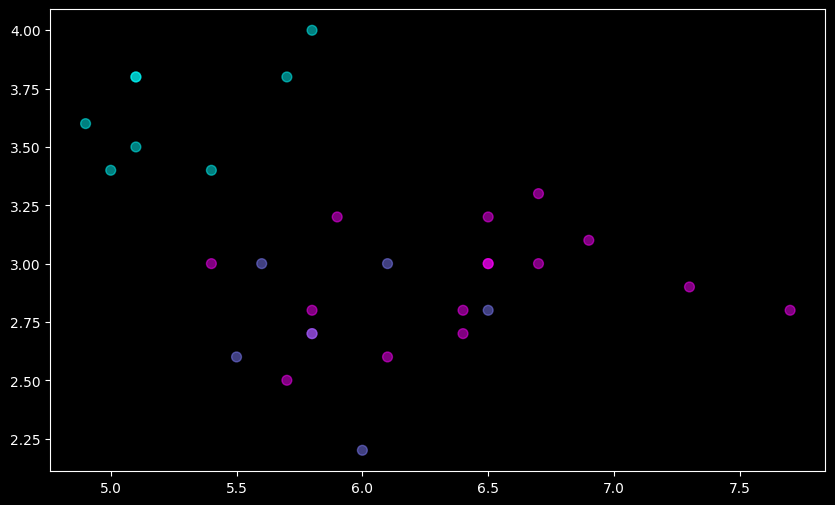

In [99]:
plt.scatter(x_test[:,0], x_test[:,1], c = predictions, s=50, alpha=0.5, cmap= 'cool')

In [ ]:
correct = (predictions == y_test).sum()
accuracy = correct/y_test.shape[0]
accuracy 

np.float64(0.9333333333333333)

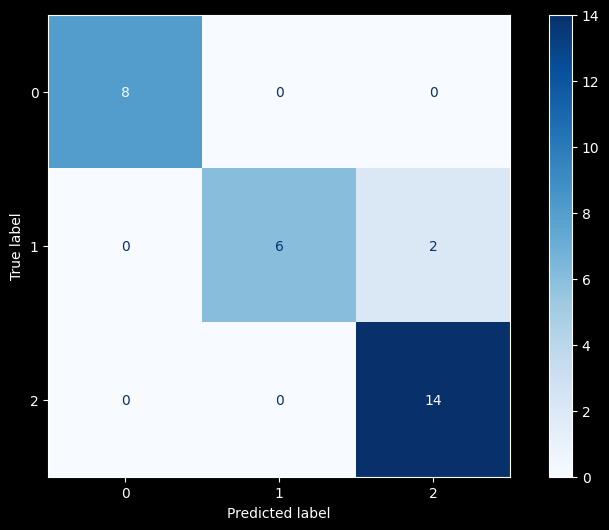

In [101]:
ConfusionMatrixDisplay.from_predictions(y_true = y_test,y_pred = predictions,cmap= 'Blues')